# 2. Basic Neural Network Example 
#### by Sooyeon Won 


### Keywords 
- Generate data using numpy
- Simple Linear Regression
- 3D Plot for training data

### Contents 

<ul>
<li><a href="#libraries">1.  Import the relevant libraries</a></li>
<li><a href="#input">2.  Generate random input data</a></li>
<li><a href="#targets">3.  Generate the targets</a></li>
<li><a href="#Plot">4.  Plot the training data</a></li>
<li><a href="#Initialize">5.  Initialize variables</a></li>
<li><a href="#learning">6.  Set a learning rate</a></li>
<li><a href="#Train">7.  Train the model</a></li>
<li><a href="#Check">8.  Check weights and biases</a></li>
<li><a href="#Plot2">9.  Plot last outputs vs targets</a></li>
</ul>






<a id='libraries'></a>
### 1. Import the relevant libraries

In [1]:
# To generate data 
import numpy as np

# To visualize outputs and targets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<a id='input'></a>
### 2. Generate random input data to train on

In [2]:
# Assign the size of training data
observations = 1000

# Generate 2 input variables: xs, zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the 2 input vectors into one matrix (1000 x 2)
inputs = np.column_stack((xs,zs))

# Check the dimensions 
print (inputs.shape)

(1000, 2)


> **Comments:** Firstly, I declared a variable ('observations'), which indicates the size of the training set that I want to generate. For this basic example, I generated 2 input variable, and named xs, xz. The variables are generated randomly and uniformly distributed. So, you can understand that the size of xs and zs is a vector of 1000(observations) x 1. Then I stacked the two dimensions (i.e. the input vectors) into one input matrix, using numpy method. Finally, I check the dimension of the input matrix. Input matrix is usally a (n x k) matrix, where n is the number of observations, and k is the number of variables. Therefore, the size of the matrix is 1000 x 2. 


<a id='targets'></a>
### 3. Generate the targets we will aim at

In [3]:
# Generate a random noise 
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the target according to the aboce defined noise. 
targets = 2*xs - 3*zs + 5 + noise


print (targets.shape)

(1000, 1)


> **Comments:**  
>- Since I want to "make up" a function, use the ML methodology, and see if the algorithm has learned it, so I generate a small random noise to the function. 
       f(x,z) = 2x - 3z + 5 + noise.
>- Then I produced the "artifical" targets according to the f(x,z) definition. In this way, we can consider that the weights should be 2 and -3, while the bias is 5.
>- Finally, I recheck the shape of the targets. It should be n x 1, since we have only one the number of output variables, so 1000 x 1.

<a id='Plot'></a>
### 4. Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

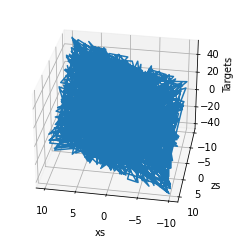

In [4]:
# Reshape the targets and inputs
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)


# Declare the figure
fig = plt.figure()

# Create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# The azim parameter is to plot the data from different angles. 
ax.view_init(azim=100)

plt.show()

In [5]:
# Reshape the targets back
targets = targets.reshape(observations,1)

>**Comments:** 
>- In order to use the 3D plot, the objects should have a certain shape. Therefore, we reshape the targets and two inputs. The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
>- Finally I reshape the targets back to the shape that they were in before plotting. The inital reshaping is only for the 3D plot.

<a id='Initialize'></a>
### 5. Initialize variables

In [6]:
# Set an initial value 
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

# Get a sense of how they were initialized I printed the weights and biases. 
print (weights)
print (biases)

[[0.0067709 ]
 [0.07125344]]
[0.06282059]


>**Comments:** 
>- I initialized the weights and biases randomly in some small initial range. 'init_range' is the variable that will measure that. Note that high initial ranges may prevent the machine learning algorithm from learning, so I started with 0.1. 
>-  Weights are of size k x m, where k is the number of input variables and m is the number of output variables. In this case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y). 
>- Biases are of size 1 since there is only 1 output. The bias is a scalar.

<a id='learning'></a>
### 6. Set a learning rate

In [7]:
# Set a learning rate
learning_rate = 0.02

<a id='Train'></a>
### 7. Train the model

In [8]:
for i in range (100):
    
    # This is the linear model: y = xw + b equation. 
    outputs = np.dot(inputs,weights) + biases
    
    # The deltas are the differences between the outputs and the targets
    deltas = outputs - targets
        
    # Loss Function: L2-norm
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Loss Function: L1-norm
    #loss = np.sum(np.absolute(deltas)) / 2 / observations
    
    # Print the values from loss function values
    print (loss)
    
    # Rescale the deltas
    deltas_scaled = deltas / observations

    # Update the weights and biases, by applying the gradient descent rules
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)


220.03066382145695
39.40170492988188
15.132583834893733
11.537294460672046
10.690884017032015
10.222874034294078
9.81902835214222
9.437179870295738
9.071207657949948
8.719788373029402
8.38225509291725
8.05804740341528
7.7466376609481316
7.44752046530002
7.160210554527674
6.884241846851181
6.619166661826918
6.3645549910862105
6.119993800366879
5.885086359430035
5.659451598472135
5.44272348994781
5.234550454795226
5.03459479210012
4.842532131273114
4.658050905851674
4.480851848073071
4.310647503398466
4.147161764200534
3.990129421858209
3.8392957365319114
3.6944160239213995
3.555255258335799
3.421587691431988
3.293196486002796
3.169873364220954
3.0514182697681917
2.9376390433013593
2.82835111072913
2.7233771837935823
2.6225469724709685
2.5256969087250876
2.4326698811651712
2.3433149801778046
2.257487253119453
2.175047469172467
2.095861893483093
2.0198020702151256
1.9467446141672191
1.876571010615874
1.8091674230593573
1.7444245085507026
1.6822372403202037
1.6225047373996733
1.56513010097

>**Comments:** 
>- I iterated over the training dataset 100 times. That works well with a learning rate of 0.02. In general, a lower learning rate would need more iterations, while a higher learning rate would need less iterations. Note that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
>- The deltas mean residuals, which are the differences between the outputs and the targets. The size of its vector is 1000 x 1. 
>- I am considering the L2-norm loss, but divided by 2 and by the number of observations. Since this is simple rescaling by a constant, this doesn't change the optimization logic, as any function holding the basic property of being lower for better results, and higher for worse results can be a loss function.

#### $$ L(y, t) =  \frac{L2-norm}{2} = \frac{\Sigma_i(y_i-t_i)²}{2}   $$


>- Then I printted the values from the loss function iterations at each step so we can observe whether it is decreasing as desired.
>- As recommended from the lecture, another small trick is to scale the deltas the same way as the loss function. In this way, the learning rate is independent of the number of samples (observations). Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate, that can remain the same if we change the number of training samples (observations). Surely, the rescaling is not necessary to solve the problem.
>- The I applied the gradient descent rules to update weights and biases. The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1. The inputs must be transposted to get an allowed operation.
>- Finally, the weights are updated in a linear algebraic way (a matrix minus another matrix). However, the biases are just a single number here, so we must transform the deltas into a scalar. The two lines are both consistent with the gradient descent method. 

<a id='Check'></a>
### 8. Print weights and biases and see if we have worked correctly.

In [9]:
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 1.99821931]
 [-2.9921009 ]] [4.32955127]


>**Comments:**  To see if the weights and the biases are converged to what I wanted, I print both of them. When declared the targets, following the f(x,z) at the beginning, we knew the weights should be 2 and -3, while the bias: 5.

<a id='Plot2'></a>
### 9. Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.


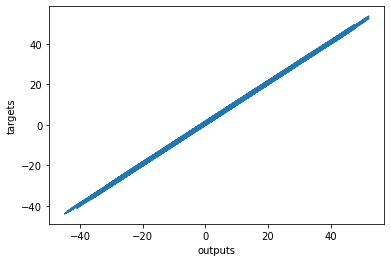

In [10]:
# Print the outputs and the targets in order to see if they have a linear relationship. 
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

### Further Practices using  L1-norm loss

Additionally, I tried with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
#### $$ L(y, t) =  \frac{\Sigma_i|y_i-t_i|}{2}   $$
  

Then I found out that 
1. Any function that has the property to be lower for better results and higher for worse results can be a loss function.
This includes the L1-norm loss.
2. Almost everything seems identical.
3. The values of the loss we generally lower (as we don't elevate to the second power).
4. For our problem, both L1-norm and L2-norm work equally well. 
5. Generally, L1-norm has more limitations than L2-norm. You can read more about that online. Overall, L2-norm loss is much more stable and computationally efficient. 